In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from utils import preprocessing, transforms
from utils.constants import PLOTCOLORS
import matplotlib.pyplot as plt

RANDOM_STATE = 21

cwd = Path.cwd()
husky_data = cwd / "norlab-data"
vulpi_data = cwd / "data"

In [2]:
# Define channels
columns = {
    "imu": {
        "wx": True,
        "wy": True,
        "wz": True,
        "ax": True,
        "ay": True,
        "az": True,
    },
    "pro": {
        "velL": True,
        "velR": True,
        "curL": True,
        "curR": True,
    },
}
summary = pd.DataFrame({"columns": pd.Series(columns)})

In [3]:
husky_summ = summary.copy()
vulpi_summ = summary.copy()

husky_dfs = preprocessing.get_recordings(husky_data, husky_summ)
vulpi_dfs = preprocessing.get_recordings(vulpi_data, vulpi_summ)

husky_pro = husky_dfs["pro"].copy()
vulpi_pro = vulpi_dfs["pro"].copy()

In [4]:
husky_pro["vx"], husky_pro["wz"] = transforms.unicycle_model(husky_pro)
vulpi_pro["vx"], vulpi_pro["wz"] = transforms.unicycle_model(vulpi_pro)

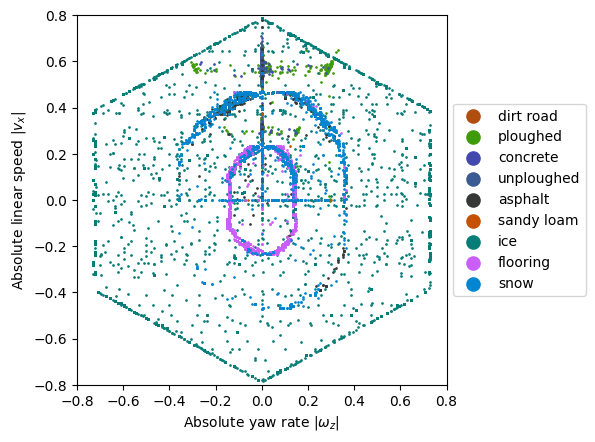

In [18]:
fig, ax = plt.subplots()
for terr in vulpi_pro.terrain.unique():
    terrdat = vulpi_pro[vulpi_pro.terrain == terr]
    terrn = terr.lower().replace("_", " ")
    ax.scatter(
        terrdat.wz,
        terrdat.vx,
        s=0.9,
        c=PLOTCOLORS[terrn],
        alpha=1,
        label=terrn,
    )
for terr in husky_pro.terrain.unique():
    terrdat = husky_pro[husky_pro.terrain == terr]
    terrn = terr.lower().replace("_", " ")
    ax.scatter(
        terrdat.wz,
        terrdat.vx,
        s=0.9,
        c=PLOTCOLORS[terrn],
        alpha=1,
        label=terrn,
    )
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), markerscale=10)

ax.set_xlabel("Absolute yaw rate $|\omega_z|$")
ax.set_ylabel("Absolute linear speed $|v_x|$")

ax.set_aspect("equal")
ax.set_xlim((-0.8, 0.8))
ax.set_ylim((-0.8, 0.8))
# ax.set_xlim((-0.05, 0.8))
# ax.set_ylim((-0.05, 0.8))

ax.get_legend_handles_labels()
ax.get_legend()
